In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import os
import warnings
import shutil

warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("./data/archive/Test.csv")
df.head()


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [6]:
from sklearn.metrics import accuracy_score

In [7]:
# path = df['Path'].values
input_path = "./data/archive/"

In [5]:
def checking_performance(df, model, input_path, model_no):
    labels = df['ClassId'].values
    path = df['Path'].values
    final_res = []
    count = 0
    correct = 0
    for img in input_path + path:
#         if count == 1000:
#             break
    #     img1 = tf.keras.preprocessing.image.load_img(img, target_size=(32, 32))
    #     test_img = tf.keras.preprocessing.image.img_to_array(img1, data_format="channels_last")/255
    #     test_img = np.expand_dims(test_img, axis=0)
        img1 = cv2.imread(img)
        temp = Image.fromarray(img1, 'RGB')
        temp = temp.resize((32, 32))
        test_img = np.array(temp) / 255
        test_img = np.expand_dims(test_img, axis=0)
        scores = model.predict(test_img)
        preds = np.argmax(scores, axis = 1)
        final_res.append(preds)
        if preds == labels[count]:
            correct += 1
        count += 1

    print(f"Model {model_no} : Total Count : {count}\tTotal correct : {correct}", end="\t")
    print(accuracy_score(labels[:count], final_res, normalize = True), end="\n")

In [6]:
models = [tf.keras.models.load_model('./model_best_2.h5'),
          tf.keras.models.load_model('./model.h5'),
         tf.keras.models.load_model('./model_best_3.h5')]

In [7]:
model_no = 1
for model in models:
    checking_performance(df, model, input_path, model_no)
    model_no += 1

Model 1 : Total Count : 12630	Total correct : 11933	0.9448139350752177
Model 2 : Total Count : 12630	Total correct : 11607	0.9190023752969121
Model 3 : Total Count : 12630	Total correct : 11859	0.9389548693586698


In [8]:
# Dictionary to map classes.
classes = { 
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)', 
    2:'Speed limit (50km/h)', 
    3:'Speed limit (60km/h)', 
    4:'Speed limit (70km/h)', 
    5:'Speed limit (80km/h)', 
    6:'End of speed limit (80km/h)', 
    7:'Speed limit (100km/h)', 
    8:'Speed limit (120km/h)', 
    9:'No passing', 
    10:'No passing veh over 3.5 tons', 
    11:'Right-of-way at intersection', 
    12:'Priority road', 
    13:'Yield', 
    14:'Stop', 
    15:'No vehicles', 
    16:'Veh > 3.5 tons prohibited', 
    17:'No entry', 
    18:'General caution', 
    19:'Dangerous curve left', 
    20:'Dangerous curve right', 
    21:'Double curve', 
    22:'Bumpy road', 
    23:'Slippery road', 
    24:'Road narrows on the right', 
    25:'Road work', 
    26:'Traffic signals', 
    27:'Pedestrians', 
    28:'Children crossing', 
    29:'Bicycles crossing', 
    30:'Beware of ice/snow',
    31:'Wild animals crossing', 
    32:'End speed + passing limits', 
    33:'Turn right ahead', 
    34:'Turn left ahead', 
    35:'Ahead only', 
    36:'Go straight or right', 
    37:'Go straight or left', 
    38:'Keep right', 
    39:'Keep left', 
    40:'Roundabout mandatory', 
    41:'End of no passing', 
    42:'End no passing veh > 3.5 tons'
          }

In [9]:
def get_output(img):
#     img1 = tf.keras.preprocessing.image.load_img(img, target_size=(32, 32), interpolation='nearest')
#     test_img = tf.keras.preprocessing.image.img_to_array(img1, data_format="channels_last")/255
#     test_img = np.expand_dims(test_img, axis=0)
    img1 = cv2.imread(img)
    temp = Image.fromarray(img1, 'RGB')
    temp = temp.resize((32, 32))
    test_img = np.array(temp) / 255
    test_img = np.expand_dims(test_img, axis=0)
    scores = model.predict(test_img)
    prob = np.max(scores, axis = 1)
    preds = np.argmax(scores, axis = 1)
    print(f"{prob[0] * 100}% probability of {classes[preds[0]]}")
    return prob[0] * 100, classes[preds[0]]

99.99961853027344% probability of Veh > 3.5 tons prohibited


Text(0.5, 1.0, 'Veh > 3.5 tons prohibited - 99.99961853027344')

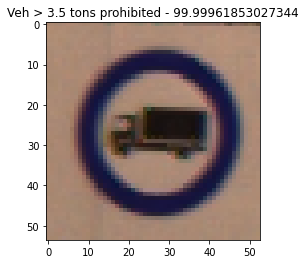

In [10]:
img = f"./data/archive/test/0000{np.random.randint(0, 10)}.png"
prob, pred = get_output(img)
img = cv2.imread(img)
plt.imshow(img)
plt.title(f"{pred} - {prob}")